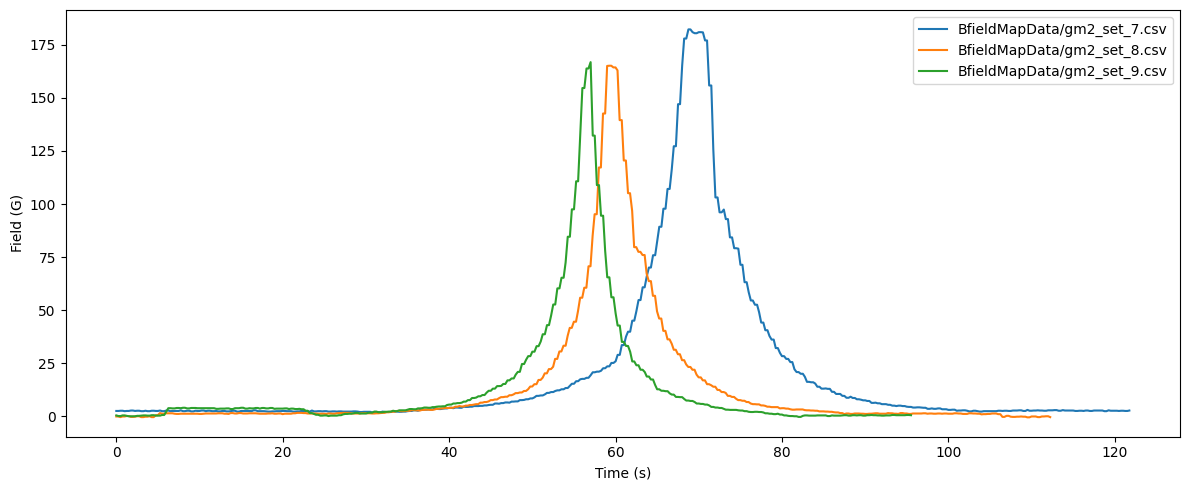

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# list every file explicitly since we cannot construct paths with other libs
files = [
    #"BfieldMapData/gm2_set_5.csv",
    #"BfieldMapData/gm2_set_6.csv",
    "BfieldMapData/gm2_set_7.csv",
    "BfieldMapData/gm2_set_8.csv",
    "BfieldMapData/gm2_set_9.csv",
    #"BfieldMapData/gm2_set_10.csv"
]

dfs = []
for f in files:
    df = pd.read_csv(
        f,
        comment="#",
        sep=",",
        names=["Time", "Field"]
    )
    df["Time"] = pd.to_timedelta(df["Time"])
    df["File"] = f
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)

plt.figure(figsize=(12,5))
for name, g in data.groupby("File"):
    plt.plot(g["Time"].dt.total_seconds(), g["Field"], label=name)

plt.xlabel("Time (s)")
plt.ylabel("Field (G)")
plt.legend()
plt.tight_layout()
plt.show()


- 0$^\circ$ = +x = East
- 90$^\circ$ = +y = North
- 180$^\circ$ = –x = West
- 270$^\circ$ = –y = South

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

files = {
    "BfieldMapData/gm2_set_7.csv": ("center",      0.0,   0),   # r=0, θ irrelevant → set θ=0
    "BfieldMapData/gm2_set_8.csv": ("southwest_edge", 10.0, 225),   # r=10 cm, θ=225
    "BfieldMapData/gm2_set_9.csv": ("east_edge",  10.0, 0)    # r=10 cm, θ=45
}

dfs = []

for f, (pos, r_val, theta_val) in files.items():
    df = pd.read_csv(
        f,
        comment="#",
        sep=",",
        names=["Time", "Field"]
    )
    df["Time"] = pd.to_timedelta(df["Time"])
    df["PosLabel"] = pos
    df["r_cm"] = r_val
    df["theta_deg"] = theta_val
    df["z_cm"] = pd.NA      # to be filled from video
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)


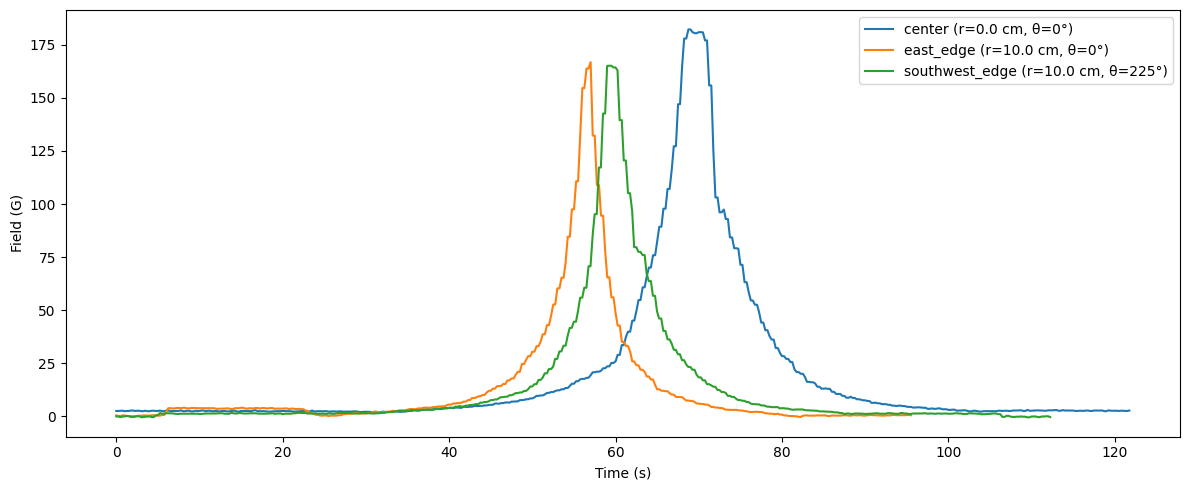

In [3]:
plt.figure(figsize=(12,5))

for pos, g in data.groupby("PosLabel"):
    pretty = f"{pos} (r={g['r_cm'].iloc[0]} cm, θ={g['theta_deg'].iloc[0]}°)"
    plt.plot(g["Time"].dt.total_seconds(), g["Field"], label=pretty)

plt.xlabel("Time (s)")
plt.ylabel("Field (G)")
plt.legend()
plt.tight_layout()
plt.savefig("BfieldvsTime.png", dpi=300, bbox_inches='tight')
plt.show()


In [4]:
# build z-position DataFrame for run7

zpos7 = pd.DataFrame({
    "zposition": [
        24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,
        9,8,7,6,5,4,3,2,1,0,1,2,3,4,5,6,7,8,9,10,11,12,
        13,14,15,16,17,18,19,20,21,22,23,24
    ],
    "time_str": [
        "00:28","00:29","00:31","00:33","00:35","00:37",
        "00:39","00:40","00:42","00:44","00:45","00:47","00:48",
        "00:50","00:51","00:53","00:54","00:56","00:58","01:00",
        "01:01","01:03","01:05","01:06","01:08","01:11","01:13",
        "01:15","01:17","01:19","01:20","01:23","01:24","01:26",
        "01:28","01:29","01:31","01:32","01:33","01:35","01:36",
        "01:38","01:40","01:41","01:42","01:44","01:46","01:47",
        "01:49"
    ]
})
####################

# build z-position DataFrame for run8
zpos8 = pd.DataFrame({
    "zposition": [
        21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0,
        1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
    ],
    "time_str": [
        "00:28.7","00:30.2","00:31.2","00:33.2","00:35.2","00:36.2",
        "00:38.3","00:39.2","00:41.2","00:42.2","00:43.2","00:44.2",
        "00:45.2","00:47.2","00:49.2","00:50.2","00:51.3","00:52.2",
        "00:54.0","00:55.2","00:56.2","00:58.2","01:01.2","01:03.2",
        "01:04.3","01:06.3","01:07.2","01:09.0","01:10.2","01:11.2",
        "01:13.2","01:14.2","01:16.2","01:17.3","01:18.2","01:20.0",
        "01:21.2","01:22.2","01:24.2","01:25.2","01:26.2","01:28.2",
        "01:29.2"
    ]
})

# build z-position DataFrame for run9
zpos9 = pd.DataFrame({
    "zposition": [
        24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,
        4,3,2,1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
    ],
    "time_str": [
        "00:20.3","00:23.0","00:24.0","00:26.0","00:27.0","00:29.0",
        "00:31.0","00:33.0","00:34.0","00:35.3","00:36.5","00:38.0",
        "00:39.3","00:41.0","00:42.0","00:44.0","00:45.3","00:47.0",
        "00:48.0","00:50.0","00:51.0","00:53.0","00:54.3","00:56.0",
        "00:57.0","00:58.0","00:59.3","01:01.0","01:02.3","01:03.3",
        "01:04.3","01:05.5","01:06.8","01:07.3","01:08.3","01:09.3",
        "01:10.0","01:11.3","01:12.3","01:14.0","01:15.0","01:16.0",
        "01:17.0","01:18.3","01:20.3","01:21.3"
    ]
})


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def interpolate_z(data, zpos_df, pos_label):
    """
    Interpolate z positions for a given probe run.
    
    Parameters:
        data : pd.DataFrame
            Your main dataframe containing Time and PosLabel.
        zpos_df : pd.DataFrame
            DataFrame with 'zposition' and 'time_str'.
        pos_label : str
            The PosLabel in data corresponding to this run.
    """
    # convert time strings to timedelta in one step
    zpos_df = zpos_df.copy()
    zpos_df["Time"] = pd.to_timedelta("00:" + zpos_df["time_str"])
    zpos_df["Time_s"] = zpos_df["Time"].dt.total_seconds()
    zpos_df = zpos_df.drop(columns=["time_str"])

    mask = data["PosLabel"] == pos_label
    data.loc[mask, "Time_s"] = data.loc[mask, "Time"].dt.total_seconds()

    # interpolate
    data.loc[mask, "z_cm"] = np.interp(
        data.loc[mask, "Time_s"],
        zpos_df["Time_s"],
        zpos_df["zposition"]
    )

    # drop temporary column
    data.drop(columns=["Time_s"], inplace=True)

# list of runs
runs = [
    ("center", zpos7),
    ("southwest_edge", zpos8),
    ("east_edge", zpos9)
]

# apply interpolation to all runs
for label, zpos_df in runs:
    interpolate_z(data, zpos_df, label)

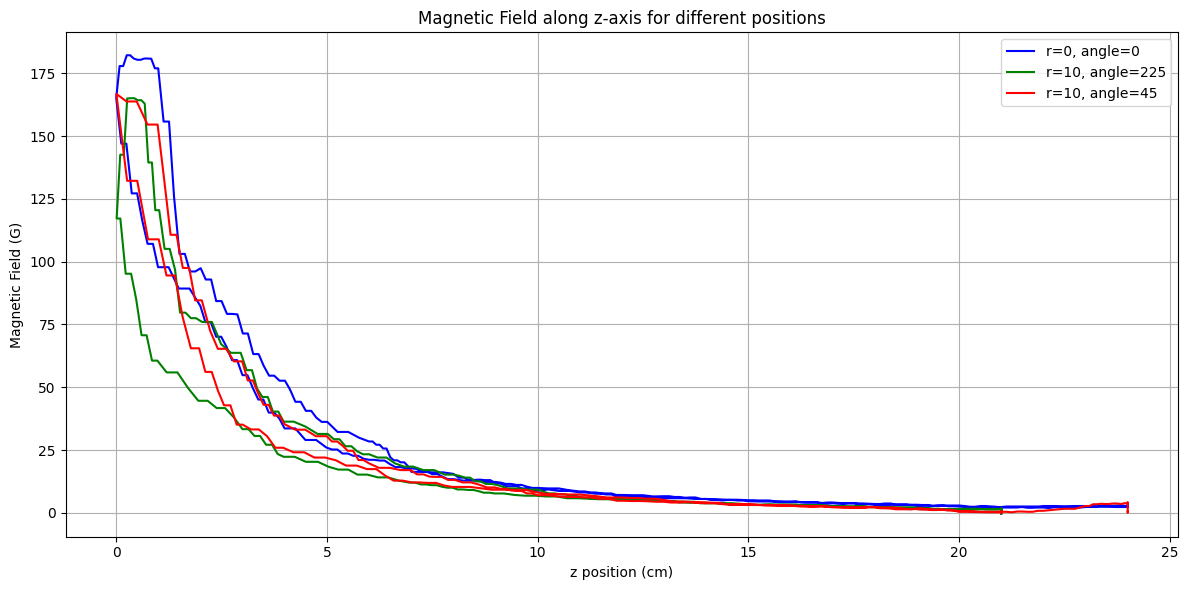

In [6]:
import matplotlib.pyplot as plt

# labels and colors for each run
run_info = [
    ("center", "blue", "r=0, angle=0"),
    ("southwest_edge", "green", "r=10, angle=225"),
    ("east_edge", "red", "r=10, angle=45")
]

plt.figure(figsize=(12,6))

for label, color, name in run_info:
    run_data = data[data["PosLabel"] == label]
    plt.plot(run_data["z_cm"], run_data["Field"], label=name, color=color, linestyle='-')

plt.xlabel("z position (cm)")
plt.ylabel("Magnetic Field (G)")
plt.title("Magnetic Field along z-axis for different positions")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("BfieldvsZ.png", dpi=300, bbox_inches='tight')
plt.show()


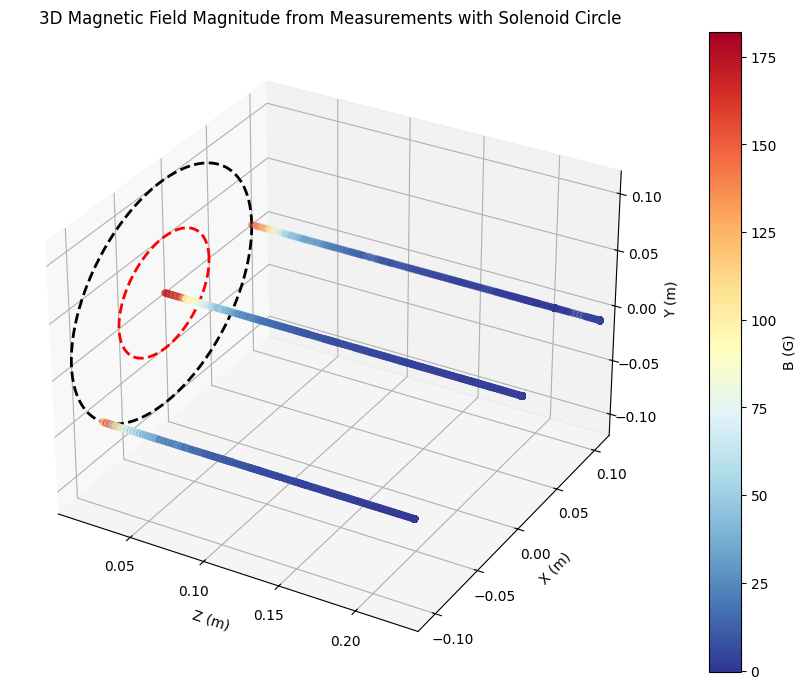

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Convert r from cm to m
r = data["r_cm"].values / 100
theta = np.deg2rad(data["theta_deg"].values)
z = data["z_cm"].values / 100  # convert cm to meters
B = data["Field"].values  # magnetic field in Gauss

# Cartesian coordinates for 3D plot
X = r * np.cos(theta)
Y = r * np.sin(theta)
Z = z

# create 3D scatter
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

# scatter colored by field magnitude
p = ax.scatter(Z, X, Y, c=B, cmap='RdYlBu_r', marker='o', s=20)

# Outer circle (already plotted)
R_outer = 0.10  # meters
theta_circle = np.linspace(0, 2*np.pi, 200)
X_outer = R_outer * np.cos(theta_circle)
Y_outer = R_outer * np.sin(theta_circle)
Z_circle = np.zeros_like(theta_circle)

ax.plot(Z_circle, X_outer, Y_outer, color='black', linewidth=2, linestyle='--', label='Outer radius')

# Inner circle
R_inner = 0.05  # meters
X_inner = R_inner * np.cos(theta_circle)
Y_inner = R_inner * np.sin(theta_circle)

ax.plot(Z_circle, X_inner, Y_inner, color='red', linewidth=2, linestyle='--', label='Inner radius')

ax.set_xlabel("Z (m)")
ax.set_ylabel("X (m)")
ax.set_zlabel("Y (m)")
ax.set_title("3D Magnetic Field Magnitude from Measurements with Solenoid Circle")

# add colorbar
fig.colorbar(p, ax=ax, label='B (G)')

# set axis limits
ax.set_xlim(Z.min(), Z.max())
ax.set_ylim(-R_outer*1.2, R_outer*1.2)
ax.set_zlim(-R_outer*1.2, R_outer*1.2)

plt.tight_layout()
plt.savefig("Bfield3dreal.png", dpi=300, bbox_inches='tight')
plt.show()


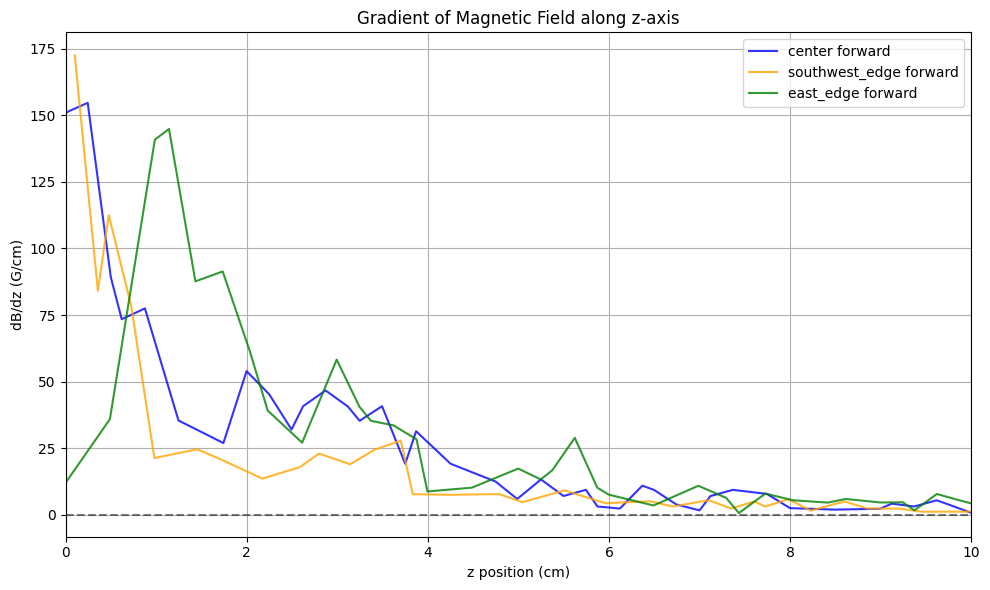

In [8]:
import matplotlib.pyplot as plt
import numpy as np

runs = {
    "center": "center",
    "southwest_edge": "southwest_edge",
    "east_edge": "east_edge"
}

colors = {
    "center": "blue",
    "southwest_edge": "orange",
    "east_edge": "green"
}

plt.figure(figsize=(10,6))

for label, pos in runs.items():
    mask = data["PosLabel"] == pos
    run = data[mask]

    z = run["z_cm"].values
    B = run["Field"].values

    # Determine direction with flipped convention
    dz = np.diff(z)
    direction = -np.sign(dz)  # decreasing z → forward (+1)
    direction = np.insert(direction, 0, direction[0])  # match length

    # Pathwise gradient
    dz_safe = dz.copy()
    dz_safe[dz_safe == 0] = np.nan
    dBdz = np.zeros_like(B)
    dBdz[1:] = np.diff(B) / dz_safe
    dBdz[0] = dBdz[1]

    # Forward mask
    mask_forward = direction > 0

    # Remove zeros
    nonzero_mask = dBdz[mask_forward] != 0
    z_plot = z[mask_forward][nonzero_mask]
    dBdz_plot = dBdz[mask_forward][nonzero_mask]

    # Plot
    plt.plot(z_plot, np.abs(dBdz_plot),
             color=colors[label],
             linestyle='-',
             alpha=0.8,
             label=f"{label} forward")

plt.axhline(0, color='k', linestyle='--', alpha=0.5)
plt.xlabel("z position (cm)")
plt.ylabel("dB/dz (G/cm)")
plt.title("Gradient of Magnetic Field along z-axis")
plt.grid(True)
plt.xlim(0, 10)
plt.legend()
plt.tight_layout()
plt.savefig("gradB.png", dpi=300, bbox_inches='tight')
plt.show()


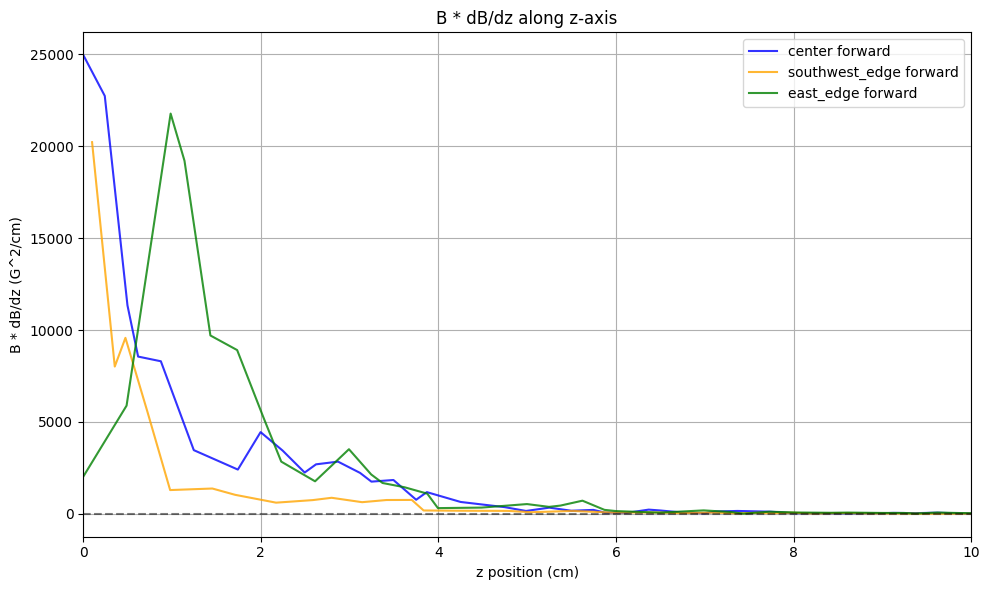

In [9]:
import matplotlib.pyplot as plt
import numpy as np

runs = {
    "center": "center",
    "southwest_edge": "southwest_edge",
    "east_edge": "east_edge"
}

colors = {
    "center": "blue",
    "southwest_edge": "orange",
    "east_edge": "green"
}

plt.figure(figsize=(10,6))

for label, pos in runs.items():
    mask = data["PosLabel"] == pos
    run = data[mask]

    z = run["z_cm"].values
    B = run["Field"].values

    # Determine direction: decreasing z → forward (+1)
    dz = np.diff(z)
    direction = -np.sign(dz)
    direction = np.insert(direction, 0, direction[0])  # match length

    # Pathwise gradient
    dz_safe = dz.copy()
    dz_safe[dz_safe == 0] = np.nan
    dBdz = np.zeros_like(B)
    dBdz[1:] = np.diff(B) / dz_safe
    dBdz[0] = dBdz[1]

    # Only forward points
    mask_forward = direction > 0

    # Compute B*dB/dz
    Bgrad = B[mask_forward] * np.abs(dBdz[mask_forward])
    z_forward = z[mask_forward]

    # Remove zeros
    nonzero_mask = Bgrad != 0
    z_plot = z_forward[nonzero_mask]
    Bgrad_plot = Bgrad[nonzero_mask]

    # Plot
    plt.plot(z_plot, Bgrad_plot,
             color=colors[label],
             linestyle='-',
             alpha=0.8,
             label=f"{label} forward")

plt.axhline(0, color='k', linestyle='--', alpha=0.5)
plt.xlabel("z position (cm)")
plt.ylabel("B * dB/dz (G^2/cm)")
plt.title("B * dB/dz along z-axis")
plt.grid(True)
plt.xlim(0, 10)
plt.legend()
plt.tight_layout()
plt.savefig("BgradB.png", dpi=300, bbox_inches='tight')
plt.show()


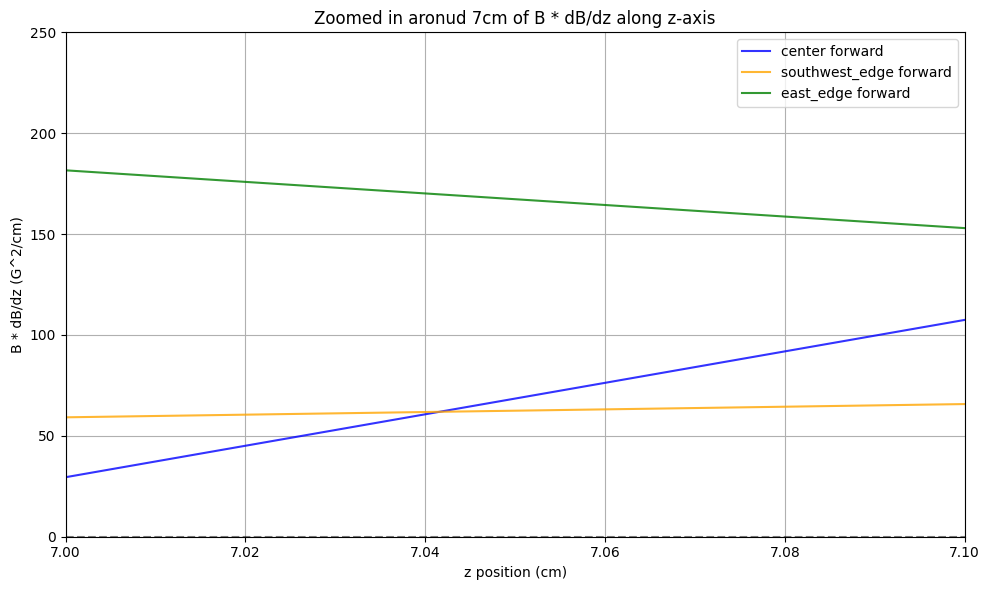

In [10]:
import matplotlib.pyplot as plt
import numpy as np

runs = {
    "center": "center",
    "southwest_edge": "southwest_edge",
    "east_edge": "east_edge"
}

colors = {
    "center": "blue",
    "southwest_edge": "orange",
    "east_edge": "green"
}

plt.figure(figsize=(10,6))

for label, pos in runs.items():
    mask = data["PosLabel"] == pos
    run = data[mask]

    z = run["z_cm"].values
    B = run["Field"].values

    # Determine direction: decreasing z → forward (+1)
    dz = np.diff(z)
    direction = -np.sign(dz)
    direction = np.insert(direction, 0, direction[0])  # match length

    # Pathwise gradient
    dz_safe = dz.copy()
    dz_safe[dz_safe == 0] = np.nan
    dBdz = np.zeros_like(B)
    dBdz[1:] = np.diff(B) / dz_safe
    dBdz[0] = dBdz[1]

    # Only forward points
    mask_forward = direction > 0

    # Compute B*dB/dz
    Bgrad = B[mask_forward] * np.abs(dBdz[mask_forward])
    z_forward = z[mask_forward]

    # Remove zeros
    nonzero_mask = Bgrad != 0
    z_plot = z_forward[nonzero_mask]
    Bgrad_plot = Bgrad[nonzero_mask]

    # Plot
    plt.plot(z_plot, Bgrad_plot,
             color=colors[label],
             linestyle='-',
             alpha=0.8,
             label=f"{label} forward")

plt.axhline(0, color='k', linestyle='--', alpha=0.5)
plt.xlabel("z position (cm)")
plt.ylabel("B * dB/dz (G^2/cm)")
plt.title("Zoomed in aronud 7cm of B * dB/dz along z-axis")
plt.grid(True)
plt.xlim(7, 7.1)
plt.ylim(0, 250)
plt.legend()
plt.tight_layout()
plt.savefig("zoomedBgradB.png", dpi=300, bbox_inches='tight')

plt.show()


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def compute_gradients_abs(df, pos_label):
    """
    Compute pathwise gradients for a single run, take absolute value to ignore direction.
    Returns a DataFrame with columns:
    ['z', 'B', 'dBdz_abs', 'B_dBdz_abs']
    """
    mask = df["PosLabel"] == pos_label
    run = df[mask].copy()
    
    z = run["z_cm"].values
    B = run["Field"].values
    
    # Pathwise dz and gradient
    dz = np.diff(z)
    dz_safe = dz.copy()
    dz_safe[dz_safe == 0] = np.nan
    
    dBdz = np.zeros_like(B)
    dBdz[1:] = np.diff(B) / dz_safe
    dBdz[0] = dBdz[1]
    
    # Take absolute value
    dBdz = np.abs(dBdz)
    
    df_run = pd.DataFrame({
        "z": z,
        "B": B,
        "dBdz_abs": dBdz,
        "B_dBdz_abs": B * dBdz
    })
    
    # Remove zero gradients
    df_run = df_run[df_run["dBdz_abs"] != 0]
    
    return df_run

# Compute for all runs
runs = ["center", "southwest_edge", "east_edge"]
all_runs_df = pd.concat([compute_gradients_abs(data, r).assign(run=r) for r in runs])


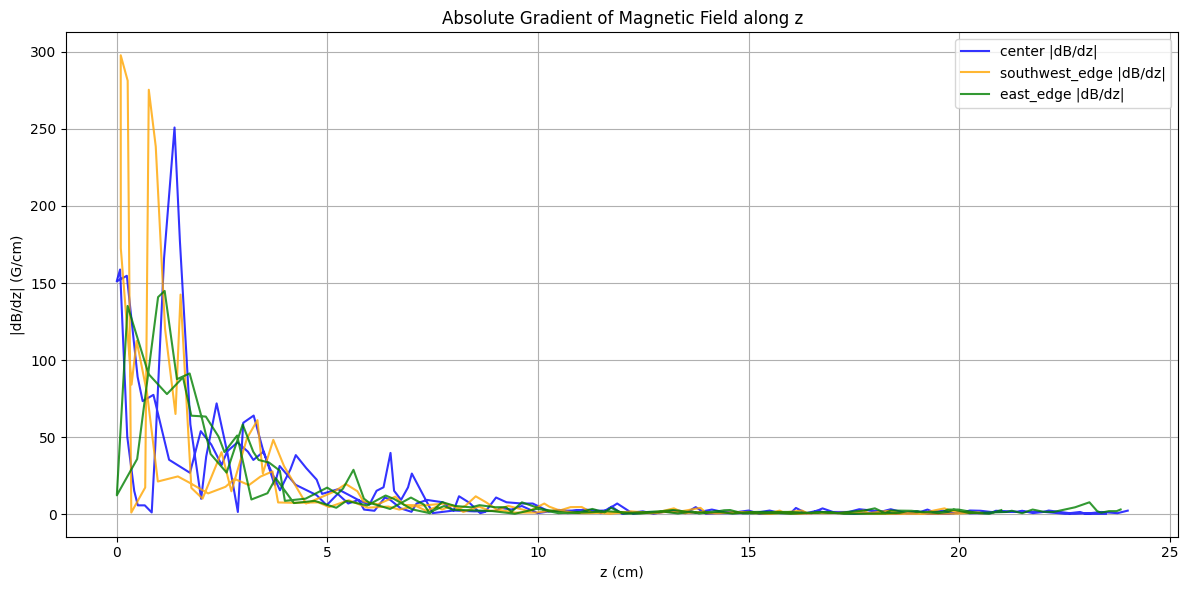

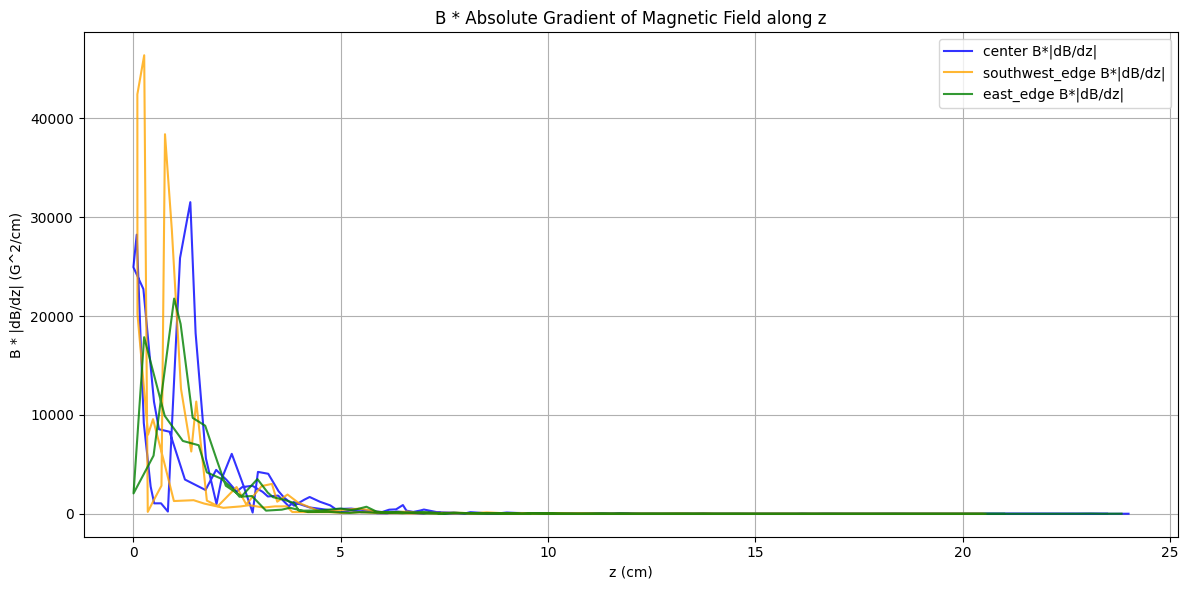

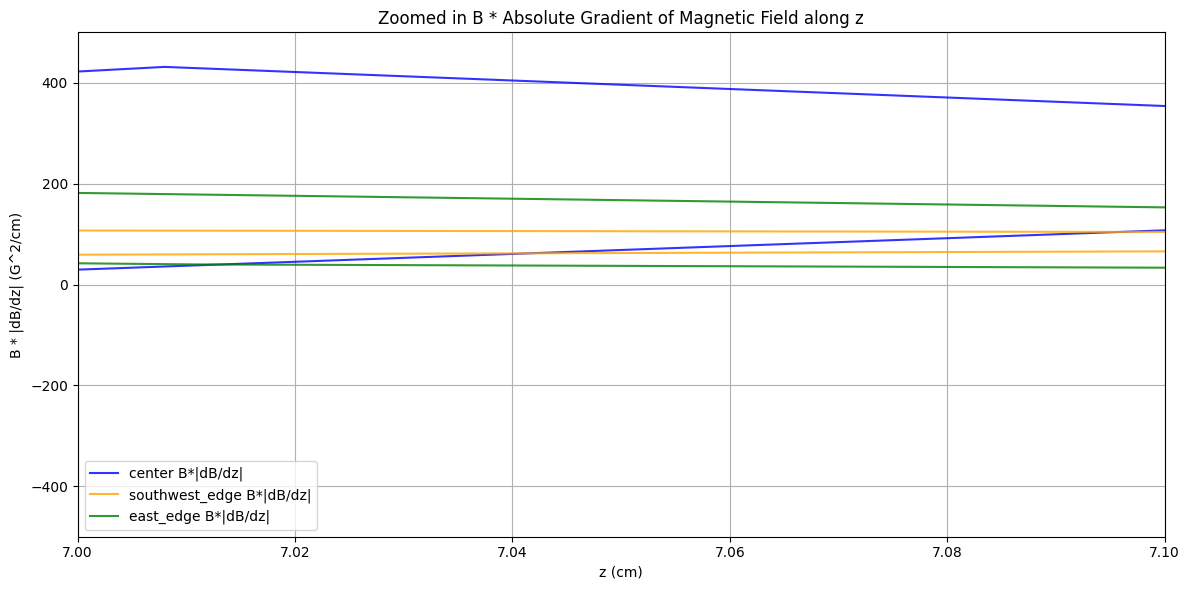

In [12]:
# ---- Plot |dB/dz| ----
plt.figure(figsize=(12,6))
colors = {"center":"blue", "southwest_edge":"orange", "east_edge":"green"}

for run in runs:
    run_df = all_runs_df[all_runs_df["run"] == run]
    plt.plot(run_df["z"], run_df["dBdz_abs"], color=colors[run], alpha=0.8, label=f"{run} |dB/dz|")

plt.xlabel("z (cm)")
plt.ylabel("|dB/dz| (G/cm)")
plt.title("Absolute Gradient of Magnetic Field along z")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ---- Plot B * |dB/dz| ----
plt.figure(figsize=(12,6))
for run in runs:
    run_df = all_runs_df[all_runs_df["run"] == run]
    plt.plot(run_df["z"], run_df["B_dBdz_abs"], color=colors[run], alpha=0.8, label=f"{run} B*|dB/dz|")

plt.xlabel("z (cm)")
plt.ylabel("B * |dB/dz| (G^2/cm)")
plt.title("B * Absolute Gradient of Magnetic Field along z")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# ---- Zoom in Plot B * |dB/dz| ----
plt.figure(figsize=(12,6))
for run in runs:
    run_df = all_runs_df[all_runs_df["run"] == run]
    plt.plot(run_df["z"], run_df["B_dBdz_abs"], color=colors[run], alpha=0.8, label=f"{run} B*|dB/dz|")

plt.xlabel("z (cm)")
plt.ylabel("B * |dB/dz| (G^2/cm)")
plt.title("Zoomed in B * Absolute Gradient of Magnetic Field along z")
plt.grid(True)
plt.xlim(7, 7.1)
plt.ylim(-500, 500)
plt.legend()
plt.tight_layout()
plt.show()


Comparable BgradB values for the translational experiments for points at 10 to 11 mm
that is 7cm away from the bore entrance up to 50 G2/cm vs 5G2/mm 

In [13]:
data

,Time,Field,PosLabel,r_cm,theta_deg,z_cm
0,0 days 00:00:00,2.6,center,0.0,0,24.0
1,0 days 00:00:00.256000,2.6,center,0.0,0,24.0
2,0 days 00:00:00.512000,2.7,center,0.0,0,24.0
3,0 days 00:00:00.752000,2.7,center,0.0,0,24.0
4,0 days 00:00:01.007000,2.5,center,0.0,0,24.0
...,...,...,...,...,...,...
1316,0 days 00:01:34.505000,0.6,east_edge,10.0,0,21.0
1317,0 days 00:01:34.761000,0.6,east_edge,10.0,0,21.0
1318,0 days 00:01:35.001000,0.7,east_edge,10.0,0,21.0
1319,0 days 00:01:35.257000,0.7,east_edge,10.0,0,21.0
